In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

low_memory=False
%config Completer.use_jedi = False

DATA_LOCATION = "data/combined/"


In [2]:
#https://towardsdatascience.com/keras-101-a-simple-and-interpretable-neural-network-model-for-house-pricing-regression-31b1a77f05ae

play_by_play_season_game_team_bins = pd.read_csv("cleanedData/play_by_play_season_game_team_bins.csv")

play_by_play_season_bins = pd.read_csv("cleanedData/play_by_play_season_bins.csv")
play_by_play_season_bins_copy = play_by_play_season_bins.fillna(0).copy()
play_by_play_season_bins_copy = play_by_play_season_bins_copy[['x_court_bin','y_court_bin','estimated_points','estimated_shot_attempts']].groupby(['x_court_bin','y_court_bin']).sum().reset_index()
play_by_play_season_bins_copy['true_expected_points'] = play_by_play_season_bins_copy['estimated_points']/play_by_play_season_bins_copy['estimated_shot_attempts']
play_by_play_season_bins_copy

,x_court_bin,y_court_bin,estimated_points,estimated_shot_attempts,true_expected_points
0,-250.0,-17.320508,340.889784,261.750000,1.302349
1,-250.0,17.320508,396.000000,377.000000,1.050398
2,-250.0,51.961524,179.185825,155.051282,1.155655
3,-250.0,86.602540,75.000000,60.000000,1.250000
4,-250.0,121.243557,9.000000,11.000000,0.818182
...,...,...,...,...,...
680,250.0,398.371686,0.000000,1.000000,0.000000
681,260.0,-34.641016,0.000000,1.000000,0.000000
682,260.0,0.000000,18.000000,19.000000,0.947368
683,260.0,34.641016,3.000000,2.000000,1.500000


In [3]:
features = play_by_play_season_bins_copy[['x_court_bin','y_court_bin','true_expected_points']]
#features = play_by_play_season_bins_copy[['expected_points']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-1.74907918, -1.42701304,  1.39276064],
       [-1.74907918, -1.17665987,  0.75889859],
       [-1.74907918, -0.92630671,  1.02370674],
       ...,
       [ 1.79915154, -1.30183646,  0.49969543],
       [ 1.79915154, -1.05148329,  1.89001485],
       [ 1.79915154, -0.55077696, -1.88370931]])

In [4]:
kmeans = KMeans( init="random",n_clusters=3,n_init=10, max_iter=300,random_state=42)
kmeans.fit(scaled_features)
kmeans.inertia_
kmeans.labels_

KMeans(init='random', n_clusters=3, random_state=42)

862.1190187121078

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,

KMeans(init='random', n_clusters=1, random_state=42)

KMeans(init='random', n_clusters=2, random_state=42)

KMeans(init='random', n_clusters=3, random_state=42)

KMeans(init='random', n_clusters=4, random_state=42)

KMeans(init='random', n_clusters=5, random_state=42)

KMeans(init='random', n_clusters=6, random_state=42)

KMeans(init='random', n_clusters=7, random_state=42)

KMeans(init='random', random_state=42)

KMeans(init='random', n_clusters=9, random_state=42)

KMeans(init='random', n_clusters=10, random_state=42)

KMeans(init='random', n_clusters=11, random_state=42)

KMeans(init='random', n_clusters=12, random_state=42)

KMeans(init='random', n_clusters=13, random_state=42)

KMeans(init='random', n_clusters=14, random_state=42)

KMeans(init='random', n_clusters=15, random_state=42)

KMeans(init='random', n_clusters=16, random_state=42)

KMeans(init='random', n_clusters=17, random_state=42)

KMeans(init='random', n_clusters=18, random_state=42)

KMeans(init='random', n_clusters=19, random_state=42)

([<matplotlib.axis.XTick at 0x1b89bed0e20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'SSE')

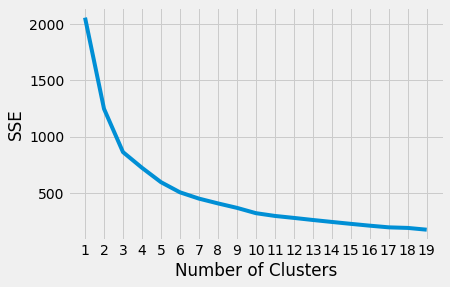

5

In [5]:
#elbow method
max_clusters = 20
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, max_clusters), sse)
plt.xticks(range(1, max_clusters))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kl = KneeLocator(
    range(1, max_clusters), sse, curve="convex", direction="decreasing"
)

kl.elbow

In [6]:
kmeans = KMeans( init="random",n_clusters=7,n_init=10, max_iter=300,random_state=42)
kmeans.fit(scaled_features)
kmeans.inertia_
kmeans.labels_
play_by_play_season_bins_copy['cluster'] = kmeans.labels_
play_by_play_season_bins_copy.to_csv("cleanedData/play_by_play_season_bins_clustered.csv")

kmeans = KMeans( init="random",n_clusters=10,n_init=10, max_iter=300,random_state=42)
kmeans.fit(scaled_features)
kmeans.inertia_
kmeans.labels_
play_by_play_season_bins_copy['cluster'] = kmeans.labels_
play_by_play_season_bins_copy.to_csv("cleanedData/play_by_play_season_bins_clustered_10.csv")

KMeans(init='random', n_clusters=7, random_state=42)

449.6468964084685

array([2, 2, 2, 2, 5, 6, 2, 2, 2, 2, 2, 5, 5, 5, 6, 6, 6, 2, 2, 2, 2, 2,
       5, 5, 5, 5, 5, 6, 6, 6, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 6, 6, 6, 6,
       2, 2, 2, 2, 5, 5, 5, 5, 6, 5, 6, 6, 6, 2, 2, 2, 2, 2, 5, 5, 5, 5,
       6, 6, 5, 6, 6, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 6, 6, 6, 6, 2, 2, 2,
       2, 2, 5, 5, 5, 5, 5, 6, 6, 6, 6, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 6, 6, 6, 6, 2, 2, 2, 2, 2,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 6, 6, 6,
       6, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 6, 6, 6, 2, 2, 2, 2, 2, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 6, 6, 6, 2,
       2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 6, 6, 6, 2, 2, 2, 2, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 6, 6, 6, 2, 2, 2, 2,
       2, 5, 5, 5, 5, 5, 6, 6, 6, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 6, 6, 3, 2, 2, 2, 2, 2, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 4, 2, 2, 2, 2, 2, 5, 5, 3,

KMeans(init='random', n_clusters=10, random_state=42)

320.5119450758736

array([2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 1, 6, 6, 6, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 6, 6, 6, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 6, 6, 6, 6,
       2, 2, 2, 2, 2, 3, 3, 3, 6, 3, 6, 6, 6, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       6, 6, 3, 6, 6, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 6, 6, 6, 6, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 6, 6, 6, 6, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 6,
       6, 6, 6, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 6, 6, 6, 6, 1, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 6, 6, 6, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 6, 6, 6,
       6, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 6, 6, 6, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 6, 6, 6, 6, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 6, 6, 6, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 6, 6, 6, 2, 2, 2, 2, 8, 3, 3, 3, 3,
       3, 6, 6, 6, 2, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 6, 6, 6, 8, 8, 8, 8,
       8, 3, 3, 3, 3, 0, 6, 6, 6, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 0, 0, 0,
       6, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 0, 6, 0, 8, 8, 8, 8, 8, 8, 3, 3,
       3, 3, 0, 6, 6, 6, 4, 8, 8, 8, 8, 8, 8, 3, 0,